#  🚀 Zomato Data Analysis

-------------------------------

This project showcases an end-to-end data analysis workflow, including data cleaning, exploratory data analysis (EDA), visualization, and actionable insights. Using real-world datasets, the project demonstrates proficiency in Python and data visualization tools to uncover trends, patterns, and data-driven recommendations.

---------------------

## 🧠 Questions

1. What type of restaurant do the majority of customers order from ?
2. How many votes has each type of restaurant received from customer ?
3. What are the ratings that the majority of restaurant have received ?
4. Zomato has observed that most couples order most of their food online. What is their average spending on each order ?
5. Which mode(online or offline) has received the maximum rating ?
6. Which type of restaurant received more offline orders, so that Zomato can provide those customer with some good offers ?

-------------------

## 1️⃣ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2️⃣ Load Dataset

In [2]:
dataframe = pd.read_csv(r"C:\Users\Shivam Mourya\DA pro\Zomato Data Analysis\Zomato data .csv")

In [3]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## 3️⃣ Basic Dataset Understanding

In [4]:
dataframe.shape

(148, 7)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
dataframe.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## 4️⃣ Data Cleaning

In [7]:
# Converting the data type of the 'rate' column to float and removing denominator

def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## 5️⃣ Answering Business Questions

Q1: What type of restaurant do the majority of customers order from ?

Text(0.5, 0, 'Type of Restauarant')

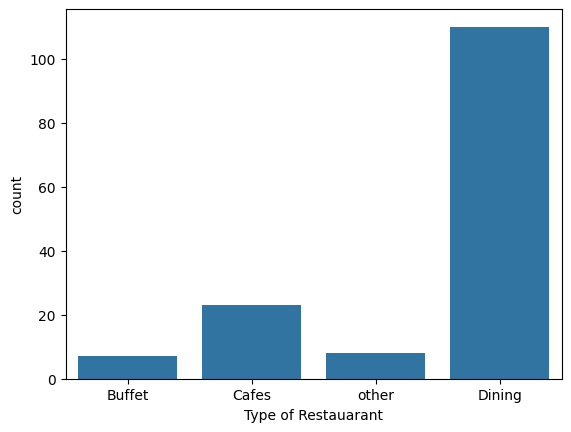

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restauarant")

Q2: How many votes has each type of restaurant received from customer ?

Text(0, 0.5, 'Votes')

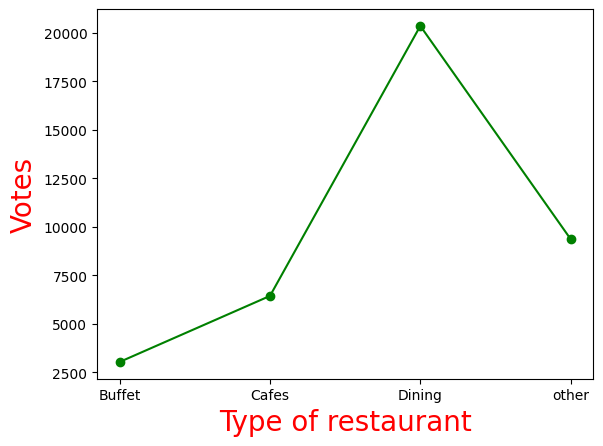

In [9]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c ='green', marker='o')
plt.xlabel("Type of restaurant", c='red', size=20)
plt.ylabel("Votes", c='red', size= 20)

Q3: What are the ratings that the majority of restaurant have received ?

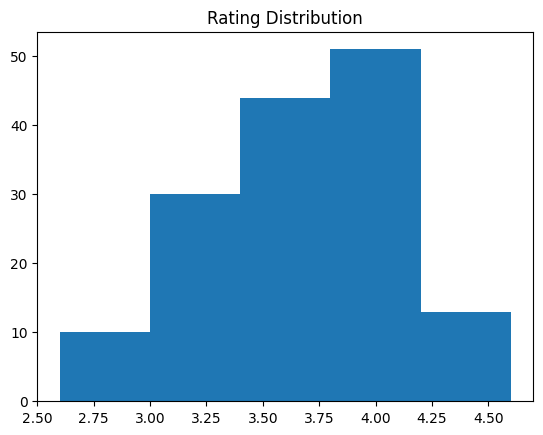

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

Q4: Zomato has observed that most couples order most of their food online. What is their average spending on each order ?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

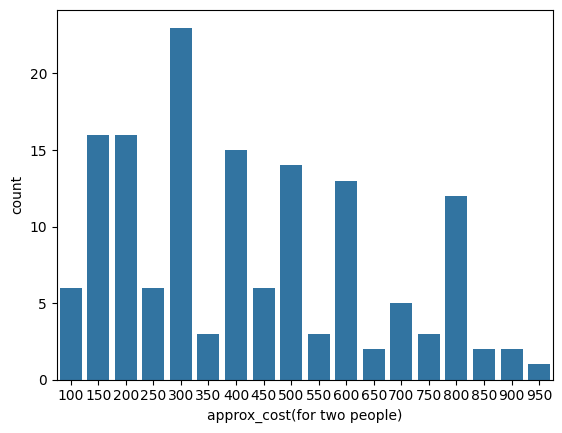

In [11]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Q5: Which mode(online or offline) has received the maximum rating ?

<Axes: xlabel='online_order', ylabel='rate'>

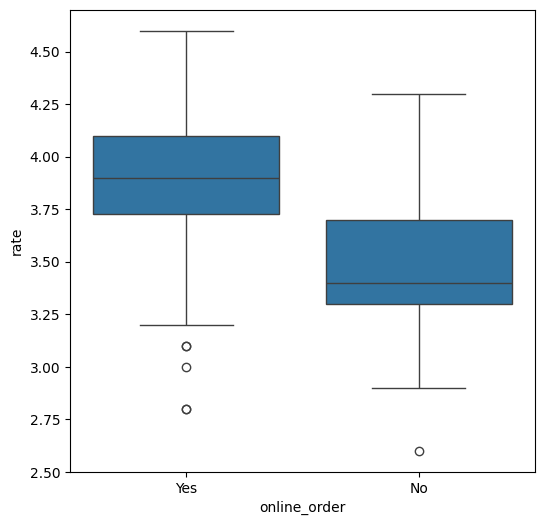

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y= 'rate', data= dataframe)

Q6: Which type of restaurant received more offline orders, so that Zomato can provide those customer with some good offers ?

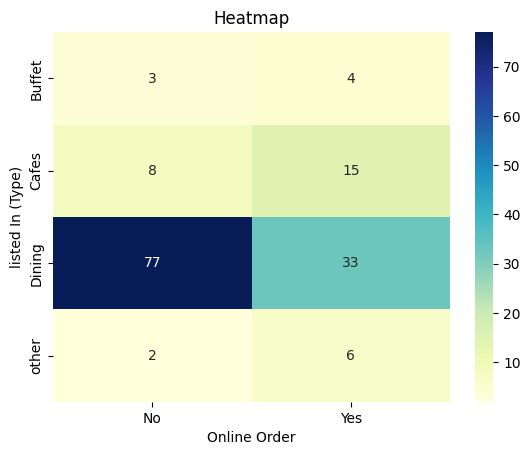

In [19]:
pivot_tabel = dataframe.pivot_table(index='listed_in(type)', columns = 'online_order',aggfunc='size')
sns.heatmap(pivot_tabel, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("listed In (Type)")
plt.show()

In [ ]:
By:- Shivam Mourya